In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import time
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.utils import plot_model

# Load Training Data

In [3]:
data = np.load('n1000000_0811.npz')

In [4]:
data.files

['ve_dune',
 'vu_dune',
 'vebar_dune',
 'vubar_dune',
 've_t2hk',
 'vu_t2hk',
 'vebar_t2hk',
 'vubar_t2hk',
 'theta12',
 'theta13',
 'theta23',
 'delta',
 'sdm',
 'ldm',
 'octant',
 'cpv',
 'mo']

Text(0.5, 1.0, '$\\theta_{12} $')

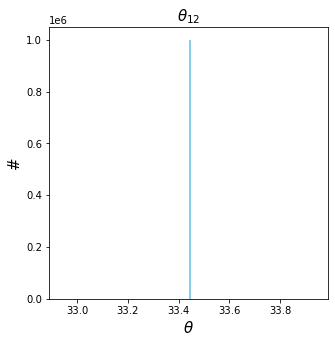

In [5]:
plt.figure(figsize = (5,5))
plt.hist(data['theta12'],bins=100,color = "skyblue")
plt.xlabel(r'$\theta $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\theta_{12} $', fontsize=15)

Text(0.5, 1.0, '$\\theta_{13} $')

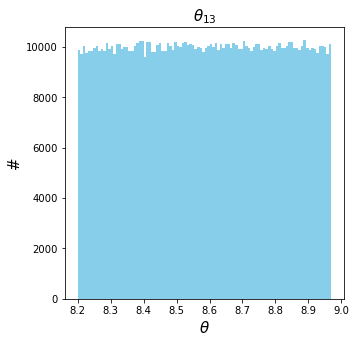

In [6]:
plt.figure(figsize = (5,5))
plt.hist(data['theta13'],bins=100,color = "skyblue")
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\theta_{13} $', fontsize=15)

Text(0.5, 1.0, '$\\theta_{23} $')

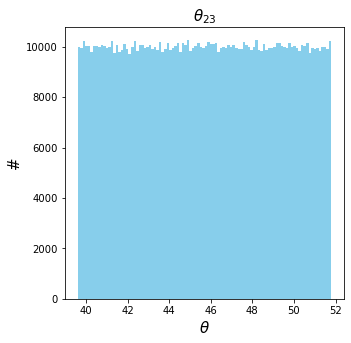

In [7]:
plt.figure(figsize = (5,5))
plt.hist(data['theta23'],bins=100,color = "skyblue")
plt.xlabel(r'$\theta $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\theta_{23} $', fontsize=15)

Text(0.5, 1.0, '$\\delta_{CP} $')

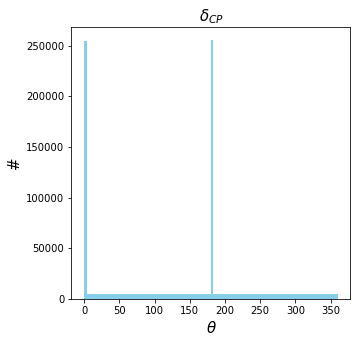

In [8]:
plt.figure(figsize = (5,5))
plt.hist(data['delta'],bins=100,color = "skyblue")
plt.xlabel(r'$\theta $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\delta_{CP} $', fontsize=15)

Text(0.5, 1.0, '$\\Delta m^2_{21} $')

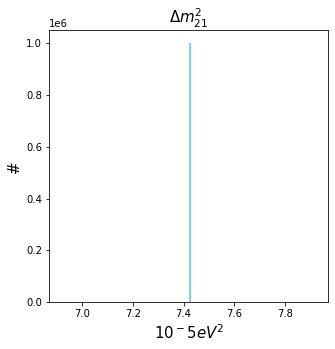

In [9]:
plt.figure(figsize = (5,5))
plt.hist(data['sdm'],bins=100,color = "skyblue")
plt.xlabel(r'$10^-5  eV^2 $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\Delta m^2_{21} $', fontsize=15)

Text(0.5, 1.0, '$\\Delta m^2_{31} $')

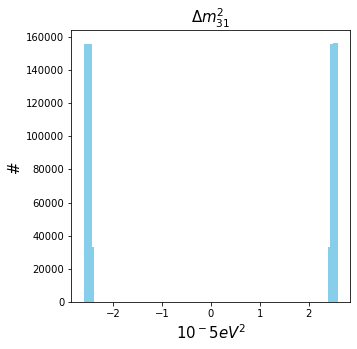

In [10]:
plt.figure(figsize = (5,5))
plt.hist(data['ldm'],bins=100,color = "skyblue")
plt.xlabel(r'$10^-5  eV^2 $', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.title(r'$\Delta m^2_{31} $', fontsize=15)

In [11]:
# Splitting 
n = 1000000

CPV = tf.keras.utils.to_categorical(data['cpv'])

ve_dune = data['ve_dune'][:n]
vu_dune = data['vu_dune'][:n]
vebar_dune = data['vebar_dune'][:n]
vubar_dune = data['vubar_dune'][:n]

ve_t2hk = data['ve_t2hk'][:n]
vu_t2hk = data['vu_t2hk'][:n]
vebar_t2hk = data['vebar_t2hk'][:n]
vubar_t2hk = data['vubar_t2hk'][:n]

###分成train / validation / test
ve_dune_train = ve_dune[:int(0.8*n)] 
ve_dune_test = ve_dune[int(0.8*n):int(0.9*n)] 
ve_dune_valid = ve_dune[int(0.9*n):int(n)] 

vu_dune_train = vu_dune[:int(0.8*n)] 
vu_dune_test = vu_dune[int(0.8*n):int(0.9*n)] 
vu_dune_valid = vu_dune[int(0.9*n):int(n)] 

vebar_dune_train = vebar_dune[:int(0.8*n)] 
vebar_dune_test = vebar_dune[int(0.8*n):int(0.9*n)] 
vebar_dune_valid = vebar_dune[int(0.9*n):int(n)] 

vubar_dune_train = vubar_dune[:int(0.8*n)] 
vubar_dune_test = vubar_dune[int(0.8*n):int(0.9*n)] 
vubar_dune_valid = vubar_dune[int(0.9*n):int(n)] 

ve_t2hk_train = ve_t2hk[:int(0.8*n)] 
ve_t2hk_test = ve_t2hk[int(0.8*n):int(0.9*n)] 
ve_t2hk_valid = ve_t2hk[int(0.9*n):int(n)] 

vu_t2hk_train = vu_t2hk[:int(0.8*n)] 
vu_t2hk_test = vu_t2hk[int(0.8*n):int(0.9*n)] 
vu_t2hk_valid = vu_t2hk[int(0.9*n):int(n)] 

vebar_t2hk_train = vebar_t2hk[:int(0.8*n)] 
vebar_t2hk_test = vebar_t2hk[int(0.8*n):int(0.9*n)] 
vebar_t2hk_valid = vebar_t2hk[int(0.9*n):int(n)] 

vubar_t2hk_train = vubar_t2hk[:int(0.8*n)] 
vubar_t2hk_test = vubar_t2hk[int(0.8*n):int(0.9*n)] 
vubar_t2hk_valid = vubar_t2hk[int(0.9*n):int(n)] 

CPV_train = CPV[:int(0.8*n)] 
CPV_test = CPV[int(0.8*n):int(0.9*n)] 
CPV_valid = CPV[int(0.9*n):int(n)] 

# Bulid up models

### DUNE+T2HK

In [12]:
input_ve_dune=keras.Input(shape=(50,),name="input_ve_dune")
input_vebar_dune=keras.Input(shape=(50,),name="input_vebar_dune")
input_ve_t2hk=keras.Input(shape=(11,),name="input_ve_t2hk")
input_vebar_t2hk=keras.Input(shape=(11,),name="input_vebar_t2hk")

input_vu_dune=keras.Input(shape=(50,),name="input_vu_dune")
input_vubar_dune=keras.Input(shape=(50,),name="input_vubar_dune")
input_vu_t2hk=keras.Input(shape=(11,),name="input_vu_t2hk")
input_vubar_t2hk=keras.Input(shape=(11,),name="input_vubar_t2hk")

dense1 =layers.Dense(128,name="dense1", activation='relu')(input_ve_dune)
dense2 =layers.Dense(128,name="dense2", activation='relu')(input_vebar_dune)
dense3 =layers.Dense(32,name="dense3", activation='relu')(input_ve_t2hk)
dense4 =layers.Dense(32,name="dense4", activation='relu')(input_vebar_t2hk)

dense6 =layers.Dense(128,name="dense6", activation='relu')(input_vu_dune)
dense7 =layers.Dense(128,name="dense7", activation='relu')(input_vubar_dune)
dense8 =layers.Dense(32,name="dense8", activation='relu')(input_vu_t2hk)
dense9 =layers.Dense(32,name="dense9", activation='relu')(input_vubar_t2hk)

concat=layers.Concatenate(name="Concatenate")([dense1,dense2,dense3,dense4,dense6,dense7,dense8,dense9])

dense5 =layers.Dense(64,name="dense5", activation='relu')(concat)

output_label =layers.Dense(2, activation='softmax',name="output_label")(dense5)

model_DUT2=keras.Model(inputs=[input_ve_dune,input_vebar_dune,input_ve_t2hk,input_vebar_t2hk
                             ,input_vu_dune,input_vubar_dune,input_vu_t2hk,input_vubar_t2hk], outputs=[output_label],name="model_DUT2")
model_DUT2.compile(loss='binary_crossentropy',
           optimizer="adam",
            metrics=('accuracy'))
model_DUT2.summary()

Model: "model_DUT2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ve_dune (InputLayer)      [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_vebar_dune (InputLayer)   [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_ve_t2hk (InputLayer)      [(None, 11)]         0                                            
__________________________________________________________________________________________________
input_vebar_t2hk (InputLayer)   [(None, 11)]         0                                            
_________________________________________________________________________________________

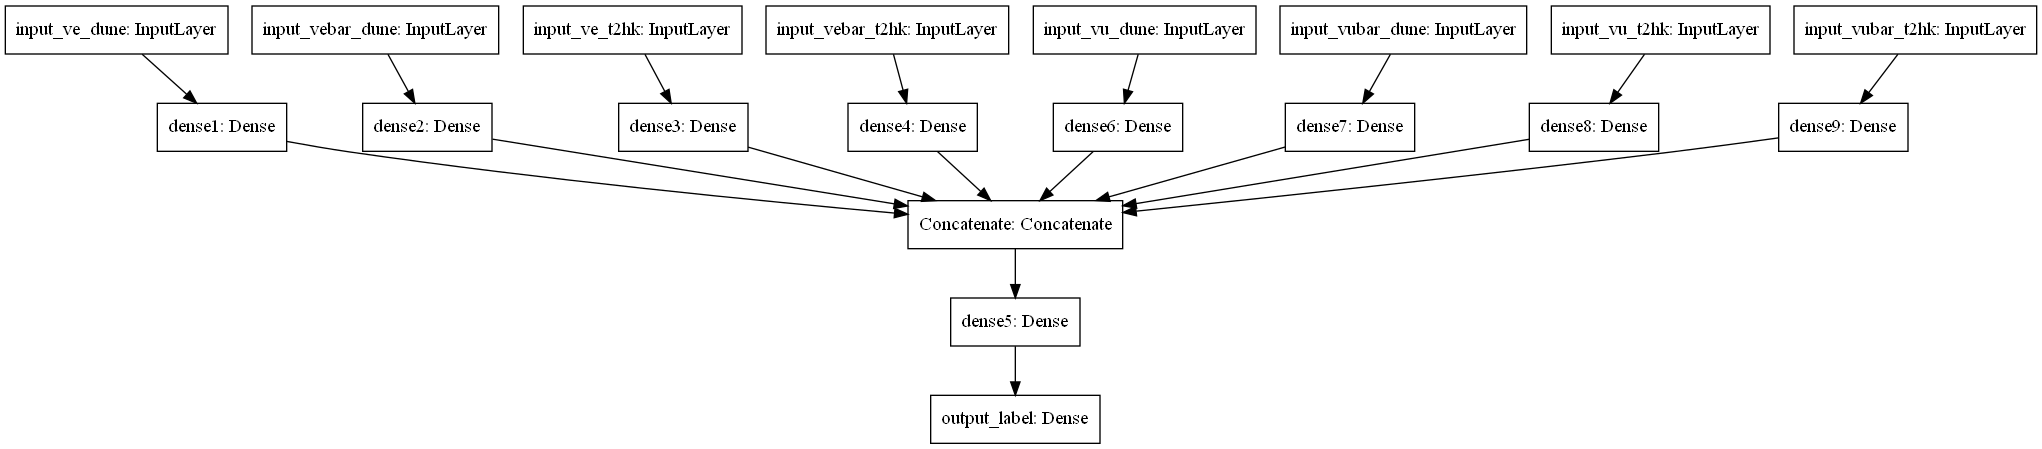

In [13]:
keras.utils.plot_model(model_DUT2, "model_DUT2.png")

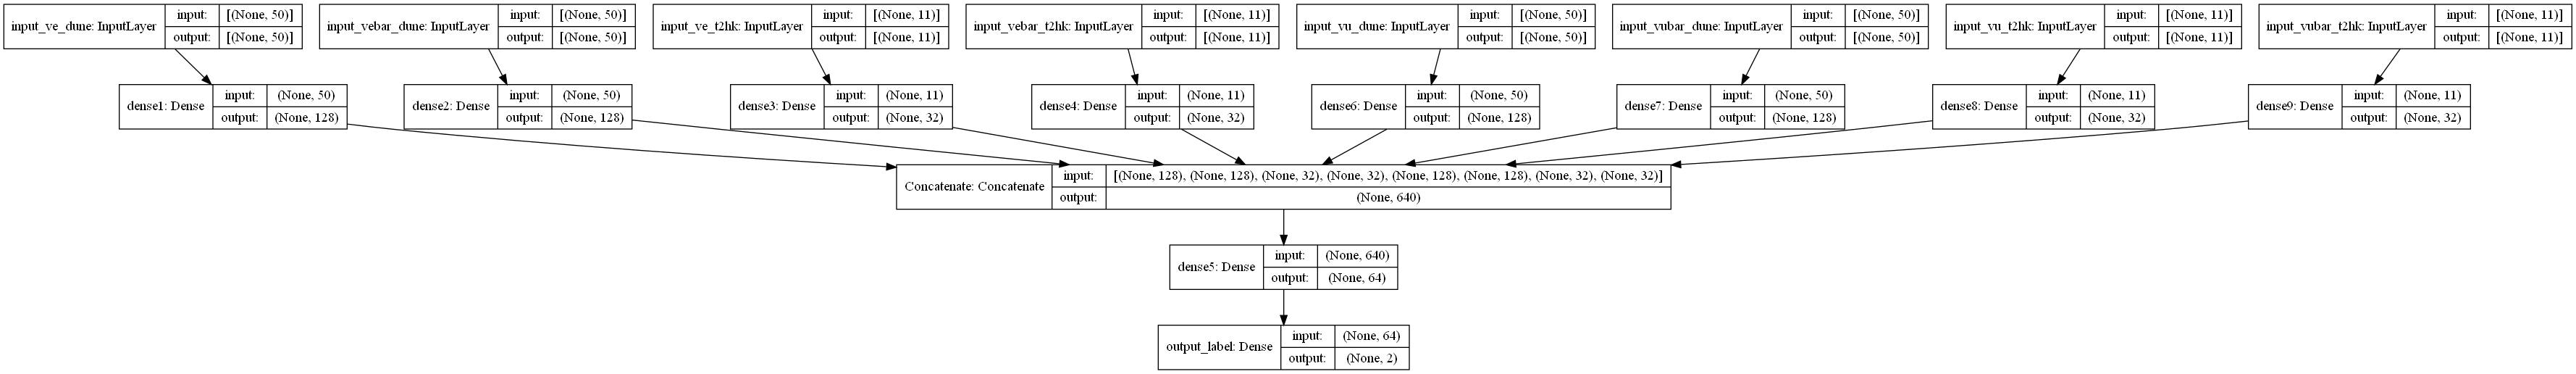

In [14]:
keras.utils.plot_model(model_DUT2, "model_DUT2_with_shape_info.png", show_shapes=True)

### DUNE

In [15]:
#DUNE
input_ve_dune=keras.Input(shape=(50,),name="input_ve_dune")
input_vebar_dune=keras.Input(shape=(50,),name="input_vebar_dune")

input_vu_dune=keras.Input(shape=(50,),name="input_vu_dune")
input_vubar_dune=keras.Input(shape=(50,),name="input_vubar_dune")

dense1 =layers.Dense(128,name="dense1", activation='relu')(input_ve_dune)
dense2 =layers.Dense(128,name="dense2", activation='relu')(input_vebar_dune)

dense6 =layers.Dense(128,name="dense6", activation='relu')(input_vu_dune)
dense7 =layers.Dense(128,name="dense7", activation='relu')(input_vubar_dune)

concat=layers.Concatenate(name="Concatenate")([dense1, dense2, dense6, dense7])

dense5 =layers.Dense(64,name="dense5", activation='relu')(concat)

output_label =layers.Dense(2, activation='softmax',name="output_label")(dense5)

model_DU=keras.Model(inputs=[input_ve_dune,input_vebar_dune
                             ,input_vu_dune,input_vubar_dune], outputs=[output_label],name="model_DU")
model_DU.compile(loss='binary_crossentropy',
           optimizer="adam",
            metrics=('accuracy'))
model_DU.summary()

Model: "model_DU"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ve_dune (InputLayer)      [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_vebar_dune (InputLayer)   [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_vu_dune (InputLayer)      [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_vubar_dune (InputLayer)   [(None, 50)]         0                                            
___________________________________________________________________________________________

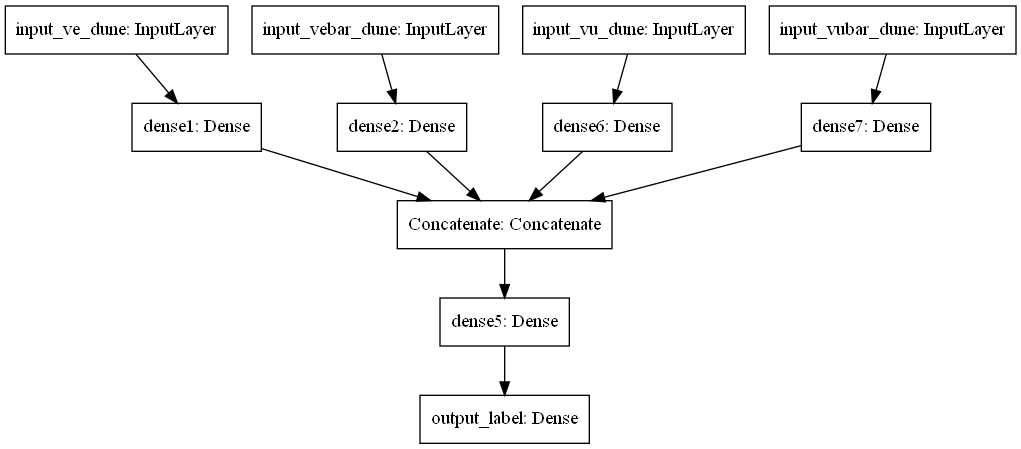

In [16]:
keras.utils.plot_model(model_DU, "model_DU.png")

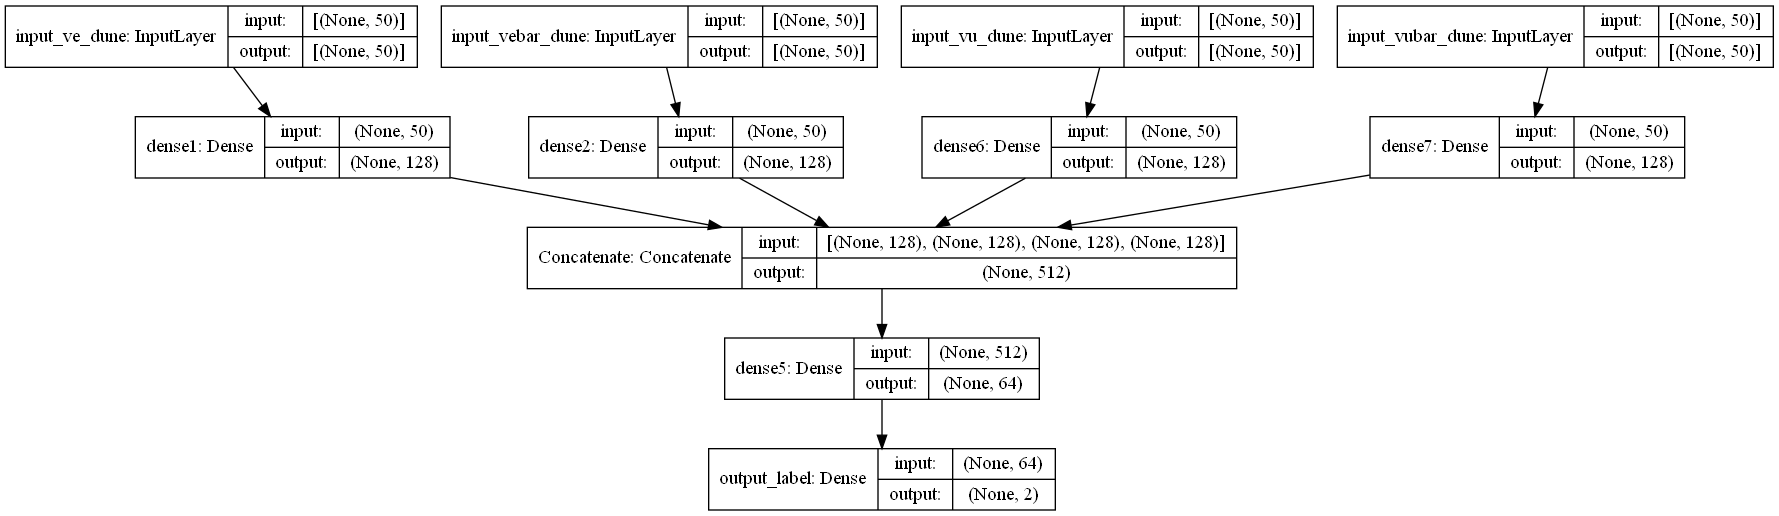

In [17]:
keras.utils.plot_model(model_DU, "model_DU_with_shape_info.png", show_shapes=True)

### T2HK

In [18]:
input_ve_t2hk=keras.Input(shape=(11,),name="input_ve_t2hk")
input_vebar_t2hk=keras.Input(shape=(11,),name="input_vebar_t2hk")

input_vu_t2hk=keras.Input(shape=(11,),name="input_vu_t2hk")
input_vubar_t2hk=keras.Input(shape=(11,),name="input_vubar_t2hk")

dense3 =layers.Dense(32,name="dense3", activation='relu')(input_ve_t2hk)
dense4 =layers.Dense(32,name="dense4", activation='relu')(input_vebar_t2hk)

dense8 =layers.Dense(32,name="dense8", activation='relu')(input_vu_t2hk)
dense9 =layers.Dense(32,name="dense9", activation='relu')(input_vubar_t2hk)

concat=layers.Concatenate(name="Concatenate")([dense3,dense4, dense8,dense9])

dense5 =layers.Dense(64,name="dense5", activation='relu')(concat)

output_label =layers.Dense(2, activation='softmax',name="output_label")(dense5)

model_T2=keras.Model(inputs=[input_ve_t2hk,input_vebar_t2hk
                             ,input_vu_t2hk,input_vubar_t2hk], outputs=[output_label],name="model_T2")
model_T2.compile(loss='binary_crossentropy',
           optimizer="adam",
            metrics=('accuracy'))
model_T2.summary()

Model: "model_T2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ve_t2hk (InputLayer)      [(None, 11)]         0                                            
__________________________________________________________________________________________________
input_vebar_t2hk (InputLayer)   [(None, 11)]         0                                            
__________________________________________________________________________________________________
input_vu_t2hk (InputLayer)      [(None, 11)]         0                                            
__________________________________________________________________________________________________
input_vubar_t2hk (InputLayer)   [(None, 11)]         0                                            
___________________________________________________________________________________________

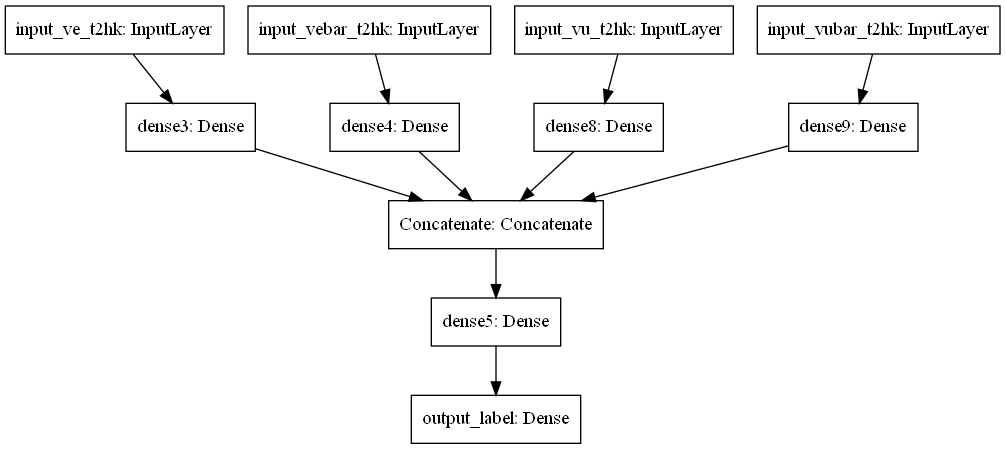

In [19]:
keras.utils.plot_model(model_T2, "model_T2.png")

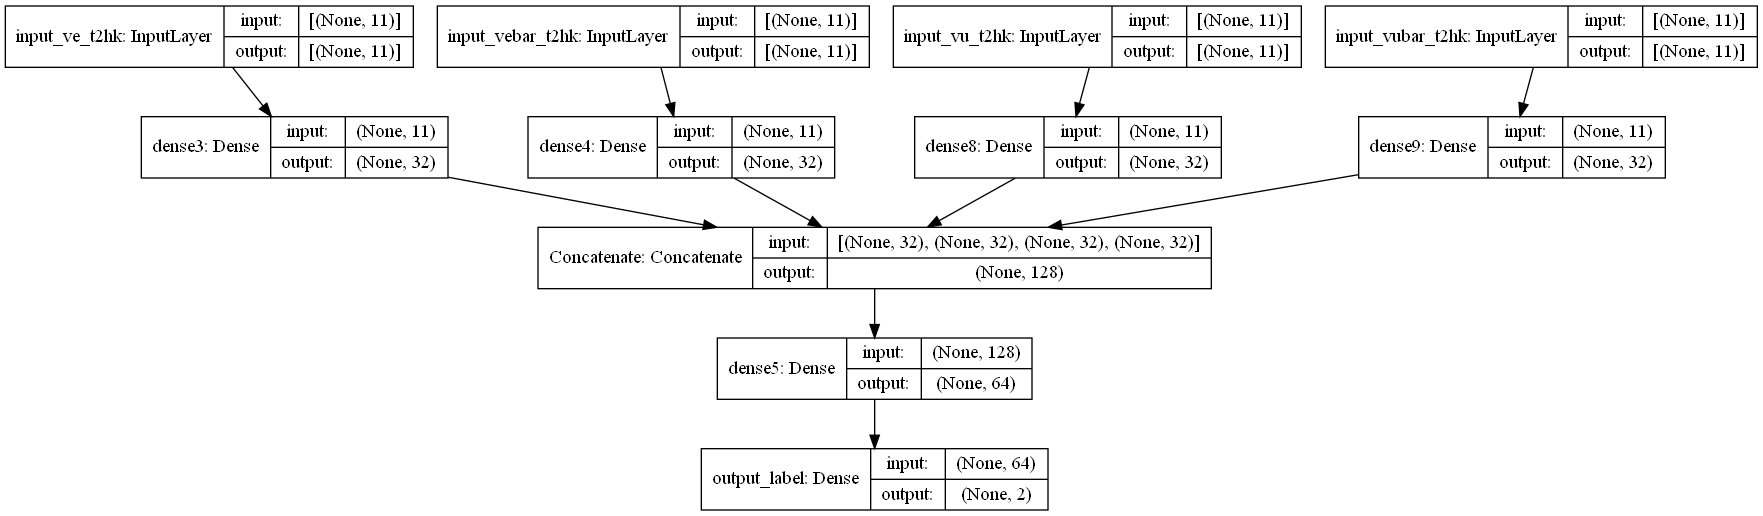

In [20]:
keras.utils.plot_model(model_T2, "model_T2_with_shape_info.png", show_shapes=True)

# Define Generators

In [21]:
batch_size = 512
nb_train_samples = len(CPV_train)
nb_valid_samples = len(CPV_valid)
nb_test_samples = len(CPV_test)

### DUNE+T2HK

In [22]:
def train_generator_DUT2():
    while True:
        for start in range(0, nb_train_samples, batch_size):
            x1_batch = []
            x2_batch = []
            x3_batch = []
            x4_batch = []
            
            x5_batch = []
            x6_batch = []
            x7_batch = []
            x8_batch = []
            
            y_batch = []               
            
            end = min(start + batch_size, nb_train_samples)
            for i in range(start, end):
                x1_batch.append(ve_dune_train[i]/np.max(ve_dune_train[i]))
                x2_batch.append(vebar_dune_train[i]/np.max(vebar_dune_train[i]))
                x3_batch.append(ve_t2hk_train[i]/np.max(ve_t2hk_train[i]))
                x4_batch.append(vebar_t2hk_train[i]/np.max(vebar_t2hk_train[i]))
                
                x5_batch.append(vu_dune_train[i]/np.max(vu_dune_train[i]))
                x6_batch.append(vubar_dune_train[i]/np.max(vubar_dune_train[i]))
                x7_batch.append(vu_t2hk_train[i]/np.max(vu_t2hk_train[i]))
                x8_batch.append(vubar_t2hk_train[i]/np.max(vubar_t2hk_train[i]))
                
                y_batch.append(CPV_train[i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch),'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch),'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
train_generator_DUT2 = train_generator_DUT2()

In [23]:
def valid_generator_DUT2():
    while True:
        for start in range(0, nb_valid_samples, batch_size):
            x1_batch = []
            x2_batch = []
            x3_batch = []
            x4_batch = []
            
            x5_batch = []
            x6_batch = []
            x7_batch = []
            x8_batch = []
            
            y_batch = []    
            
            end = min(start + batch_size, nb_valid_samples)
            for i in range(start, end):
                x1_batch.append(ve_dune_valid[i]/np.max(ve_dune_valid[i]))
                x2_batch.append(vebar_dune_valid[i]/np.max(vebar_dune_valid[i]))
                x3_batch.append(ve_t2hk_valid[i]/np.max(ve_t2hk_valid[i]))
                x4_batch.append(vebar_t2hk_valid[i]/np.max(vebar_t2hk_valid[i]))
               
                x5_batch.append(vu_dune_valid[i]/np.max(vu_dune_valid[i]))
                x6_batch.append(vubar_dune_valid[i]/np.max(vubar_dune_valid[i]))
                x7_batch.append(vu_t2hk_valid[i]/np.max(vu_t2hk_valid[i]))
                x8_batch.append(vubar_t2hk_valid[i]/np.max(vubar_t2hk_valid[i]))   
                
                y_batch.append(CPV_valid[i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch),'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch),'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
valid_generator_DUT2 = valid_generator_DUT2()

In [24]:
def test_generator_DUT2():
    while True:
        for start in range(0, nb_test_samples, batch_size):
            x1_batch = []
            x2_batch = []
            x3_batch = []
            x4_batch = []
            
            x5_batch = []
            x6_batch = []
            x7_batch = []
            x8_batch = []
                        
            y_batch = []                       
            end = min(start + batch_size, nb_test_samples)
            for i in range(start, end):
                x1_batch.append(ve_dune_test[i]/np.max(ve_dune_test[i]))
                x2_batch.append(vebar_dune_test[i]/np.max(vebar_dune_test[i]))
                x3_batch.append(ve_t2hk_test[i]/np.max(ve_t2hk_test[i]))
                x4_batch.append(vebar_t2hk_test[i]/np.max(vebar_t2hk_test[i]))
                
                x5_batch.append(vu_dune_test[i]/np.max(vu_dune_test[i]))
                x6_batch.append(vubar_dune_test[i]/np.max(vubar_dune_test[i]))
                x7_batch.append(vu_t2hk_test[i]/np.max(vu_t2hk_test[i]))
                x8_batch.append(vubar_t2hk_test[i]/np.max(vubar_t2hk_test[i]))
                
                y_batch.append(CPV_test[i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch),'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch),'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
test_generator_DUT2 = test_generator_DUT2()

### DUNE

In [25]:
def train_generator_DU():
    while True:
        for start in range(0, nb_train_samples, batch_size):
            x1_batch = []
            x2_batch = []
            
            x5_batch = []
            x6_batch = []
            
            y_batch = []               
            
            end = min(start + batch_size, nb_train_samples)
            for i in range(start, end):
                x1_batch.append(ve_dune_train[i]/np.max(ve_dune_train[i]))
                x2_batch.append(vebar_dune_train[i]/np.max(vebar_dune_train[i]))
                
                x5_batch.append(vu_dune_train[i]/np.max(vu_dune_train[i]))
                x6_batch.append(vubar_dune_train[i]/np.max(vubar_dune_train[i]))
                
                y_batch.append(CPV_train[i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch)},
                   {'output_label':np.array(y_batch)})
train_generator_DU = train_generator_DU()

In [26]:
def valid_generator_DU():
    while True:
        for start in range(0, nb_valid_samples, batch_size):
            x1_batch = []
            x2_batch = []
            
            x5_batch = []
            x6_batch = []
            
            y_batch = []    
            
            end = min(start + batch_size, nb_valid_samples)
            for i in range(start, end):
                x1_batch.append(ve_dune_valid[i]/np.max(ve_dune_valid[i]))
                x2_batch.append(vebar_dune_valid[i]/np.max(vebar_dune_valid[i]))
               
                x5_batch.append(vu_dune_valid[i]/np.max(vu_dune_valid[i]))
                x6_batch.append(vubar_dune_valid[i]/np.max(vubar_dune_valid[i])) 
                
                y_batch.append(CPV_valid[i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch)},
                   {'output_label':np.array(y_batch)})
valid_generator_DU = valid_generator_DU()

In [27]:
def test_generator_DU():
    while True:
        for start in range(0, nb_test_samples, batch_size):
            x1_batch = []
            x2_batch = []
            
            x5_batch = []
            x6_batch = []
                        
            y_batch = []                       
            end = min(start + batch_size, nb_test_samples)
            for i in range(start, end):
                x1_batch.append(ve_dune_test[i]/np.max(ve_dune_test[i]))
                x2_batch.append(vebar_dune_test[i]/np.max(vebar_dune_test[i]))
                
                x5_batch.append(vu_dune_test[i]/np.max(vu_dune_test[i]))
                x6_batch.append(vubar_dune_test[i]/np.max(vubar_dune_test[i]))
                
                y_batch.append(CPV_test[i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch)},
                   {'output_label':np.array(y_batch)})
test_generator_DU = test_generator_DU()

### T2HK

In [28]:
def train_generator_T2():
    while True:
        for start in range(0, nb_train_samples, batch_size):
            x3_batch = []
            x4_batch = []

            x7_batch = []
            x8_batch = []
            
            y_batch = []               
            
            end = min(start + batch_size, nb_train_samples)
            for i in range(start, end):
                x3_batch.append(ve_t2hk_train[i]/np.max(ve_t2hk_train[i]))
                x4_batch.append(vebar_t2hk_train[i]/np.max(vebar_t2hk_train[i]))
                
                x7_batch.append(vu_t2hk_train[i]/np.max(vu_t2hk_train[i]))
                x8_batch.append(vubar_t2hk_train[i]/np.max(vubar_t2hk_train[i]))
                
                y_batch.append(CPV_train[i])   
    
            yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
train_generator_T2 = train_generator_T2()

In [29]:
def valid_generator_T2():
    while True:
        for start in range(0, nb_valid_samples, batch_size):
            x3_batch = []
            x4_batch = []
            
            x7_batch = []
            x8_batch = []
            
            y_batch = []    
            
            end = min(start + batch_size, nb_valid_samples)
            for i in range(start, end):
                x3_batch.append(ve_t2hk_valid[i]/np.max(ve_t2hk_valid[i]))
                x4_batch.append(vebar_t2hk_valid[i]/np.max(vebar_t2hk_valid[i]))
               
                x7_batch.append(vu_t2hk_valid[i]/np.max(vu_t2hk_valid[i]))
                x8_batch.append(vubar_t2hk_valid[i]/np.max(vubar_t2hk_valid[i]))   
                
                y_batch.append(CPV_valid[i])   
    
            yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
valid_generator_T2 = valid_generator_T2()

In [30]:
def test_generator_T2():
    while True:
        for start in range(0, nb_test_samples, batch_size):
            x3_batch = []
            x4_batch = []

            x7_batch = []
            x8_batch = []
                        
            y_batch = []                       
            end = min(start + batch_size, nb_test_samples)
            for i in range(start, end):
                x3_batch.append(ve_t2hk_test[i]/np.max(ve_t2hk_test[i]))
                x4_batch.append(vebar_t2hk_test[i]/np.max(vebar_t2hk_test[i]))
                
                x7_batch.append(vu_t2hk_test[i]/np.max(vu_t2hk_test[i]))
                x8_batch.append(vubar_t2hk_test[i]/np.max(vubar_t2hk_test[i]))
                
                y_batch.append(CPV_test[i])   
    
            yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
test_generator_T2 = test_generator_T2()

In [31]:
next(test_generator_T2)

({'input_ve_t2hk': array([[1.        , 0.6285941 , 0.42131037, ..., 0.32906424, 0.23072664,
          0.23504513],
         [1.        , 0.62804892, 0.42074127, ..., 0.29682785, 0.20915557,
          0.21596204],
         [1.        , 0.62621434, 0.41885653, ..., 0.38845516, 0.25764907,
          0.2484626 ],
         ...,
         [1.        , 0.62798869, 0.42067184, ..., 0.34651632, 0.23311784,
          0.22947216],
         [1.        , 0.62507863, 0.41768706, ..., 0.25419346, 0.17636298,
          0.18295381],
         [1.        , 0.62706267, 0.4197201 , ..., 0.27690808, 0.1931309 ,
          0.19918972]]),
  'input_vebar_t2hk': array([[1.        , 0.04846287, 0.11702768, ..., 0.15293525, 0.07275595,
          0.51486361],
         [1.        , 0.04843347, 0.11981214, ..., 0.15220522, 0.07164187,
          0.49785294],
         [1.        , 0.04834747, 0.097057  , ..., 0.11948317, 0.06194583,
          0.46545979],
         ...,
         [1.        , 0.04842418, 0.10012393, ..., 

# Model Training

In [32]:
epochs = 5

### DUNE+T2HK

In [33]:
History_DUT2 = model_DUT2.fit(
    train_generator_DUT2,
    epochs= epochs,
    steps_per_epoch= nb_train_samples // batch_size,
    validation_data= valid_generator_DUT2,
    validation_steps = nb_valid_samples//batch_size,
    shuffle = True
)

Epoch 1/5
1562/1562 [==============================] - 65s 41ms/step - loss: 0.4489 - accuracy: 0.7909 - val_loss: 0.2983 - val_accuracy: 0.8937
Epoch 2/5
1562/1562 [==============================] - 62s 40ms/step - loss: 0.2359 - accuracy: 0.9173 - val_loss: 0.1899 - val_accuracy: 0.9360
Epoch 3/5
1562/1562 [==============================] - 62s 40ms/step - loss: 0.1851 - accuracy: 0.9385 - val_loss: 0.1566 - val_accuracy: 0.9470
Epoch 4/5
1562/1562 [==============================] - 59s 38ms/step - loss: 0.1609 - accuracy: 0.9482 - val_loss: 0.1423 - val_accuracy: 0.9557
Epoch 5/5
1562/1562 [==============================] - 60s 38ms/step - loss: 0.1485 - accuracy: 0.9533 - val_loss: 0.1626 - val_accuracy: 0.9422


In [34]:
model_DUT2.save("model_DUT2.h5")

In [36]:
model_DUT2 = tf.keras.models.load_model("model_DUT2.h5")

In [37]:
# Evaluating the model
scores_test_DUT2 = model_DUT2.evaluate_generator(generator=test_generator_DUT2, steps=nb_test_samples // batch_size)
print("Test accuracy is {}".format(scores_test_DUT2[1]))

scores_train_DUT2 = model_DUT2.evaluate_generator(generator=train_generator_DUT2, steps=nb_train_samples // batch_size)
print("Train accuracy is {}".format(scores_train_DUT2[1]))

C:\Users\Cheng-Li\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test accuracy is 0.9409955739974976
Train accuracy is 0.9410210251808167


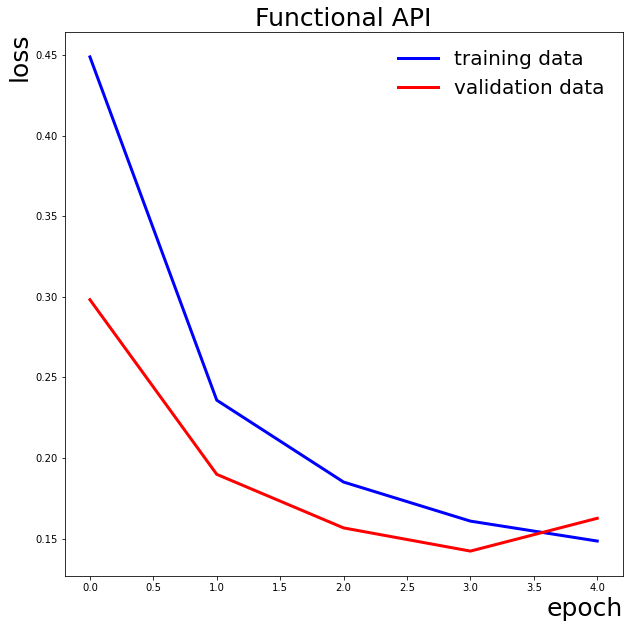

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.plot(History_DUT2.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_DUT2.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("Functional API", fontsize=25)

ax.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)

plt.show()

### DUNE

In [39]:
History_DU = model_DU.fit(
    train_generator_DU,
    epochs= 5,
    steps_per_epoch= nb_train_samples // batch_size,
    validation_data= valid_generator_DU,
    validation_steps = nb_valid_samples//batch_size,
    shuffle = True
)

Epoch 1/5
1562/1562 [==============================] - 33s 21ms/step - loss: 0.4337 - accuracy: 0.8005 - val_loss: 0.2790 - val_accuracy: 0.9041
Epoch 2/5
1562/1562 [==============================] - 32s 20ms/step - loss: 0.2235 - accuracy: 0.9237 - val_loss: 0.1860 - val_accuracy: 0.9361
Epoch 3/5
1562/1562 [==============================] - 32s 20ms/step - loss: 0.1868 - accuracy: 0.9392 - val_loss: 0.1646 - val_accuracy: 0.9476
Epoch 4/5
1562/1562 [==============================] - 32s 21ms/step - loss: 0.1762 - accuracy: 0.9433 - val_loss: 0.1730 - val_accuracy: 0.9482
Epoch 5/5
1562/1562 [==============================] - 33s 21ms/step - loss: 0.1723 - accuracy: 0.9447 - val_loss: 0.1661 - val_accuracy: 0.9474


In [40]:
model_DU.save("model_DU.h5")

In [41]:
model_DU = tf.keras.models.load_model("model_DU.h5")

In [42]:
# Evaluating the model
scores_test_DU = model_DU.evaluate_generator(generator=test_generator_DU, steps=nb_test_samples // batch_size)
print("Test accuracy is {}".format(scores_test_DU[1]))

scores_train_DU = model_DU.evaluate_generator(generator=train_generator_DU, steps=nb_train_samples // batch_size)
print("Train accuracy is {}".format(scores_train_DU[1]))

Test accuracy is 0.9453425407409668
Train accuracy is 0.9462268352508545


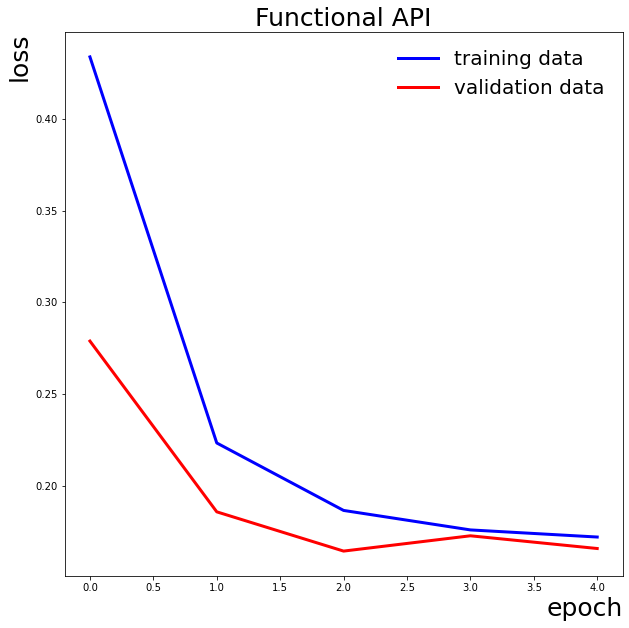

In [43]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.plot(History_DU.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_DU.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("Functional API", fontsize=25)

ax.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)

plt.show()

### T2HK

In [44]:
History_T2 = model_T2.fit(
    train_generator_T2,
    epochs= 15,
    steps_per_epoch= nb_train_samples // batch_size,
    validation_data= valid_generator_T2,
    validation_steps = nb_valid_samples//batch_size,
    shuffle = True
)

Epoch 1/15
1562/1562 [==============================] - 33s 21ms/step - loss: 0.5051 - accuracy: 0.7587 - val_loss: 0.3685 - val_accuracy: 0.8510
Epoch 2/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.3441 - accuracy: 0.8673 - val_loss: 0.3163 - val_accuracy: 0.8798
Epoch 3/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.3006 - accuracy: 0.8886 - val_loss: 0.2830 - val_accuracy: 0.8928
Epoch 4/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.2734 - accuracy: 0.8975 - val_loss: 0.2634 - val_accuracy: 0.9011
Epoch 5/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.2588 - accuracy: 0.9026 - val_loss: 0.2497 - val_accuracy: 0.9062
Epoch 6/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.2493 - accuracy: 0.9064 - val_loss: 0.2428 - val_accuracy: 0.9081
Epoch 7/15
1562/1562 [==============================] - 32s 21ms/step - loss: 0.2427 - accuracy: 0.9088 - val_loss: 0.2371 -

In [45]:
model_T2.save("model_T2.h5")

In [46]:
model_T2 = tf.keras.models.load_model("model_T2.h5")

In [47]:
# Evaluating the model
scores_test_T2 = model_T2.evaluate_generator(generator=test_generator_T2, steps=nb_test_samples // batch_size)
print("Test accuracy is {}".format(scores_test_T2[1]))

scores_train_T2 = model_T2.evaluate_generator(generator=train_generator_T2, steps=nb_train_samples // batch_size)
print("Train accuracy is {}".format(scores_train_T2[1]))

Test accuracy is 0.9234882593154907
Train accuracy is 0.9227905869483948


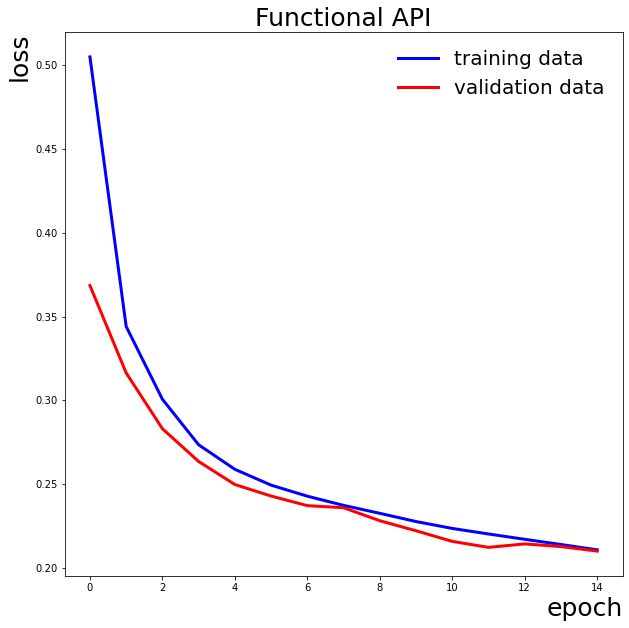

In [48]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.plot(History_T2.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_T2.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("Functional API", fontsize=25)

ax.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)

plt.show()

# Score Predict

### Load Input Data

In [49]:
data2 = np.load('sample_4-1.npz')
data2.files

['ve_dune',
 'vu_dune',
 'vebar_dune',
 'vubar_dune',
 've_t2hk',
 'vu_t2hk',
 'vebar_t2hk',
 'vubar_t2hk',
 'theta12',
 'theta13',
 'theta23',
 'delta',
 'sdm',
 'ldm',
 'octant',
 'cpv',
 'mo',
 'deltacp']

### Build Input Generator

In [50]:
N_input = len(data2['deltacp'])

In [51]:
def input_generator_DUT2():
    while True:
        for start in range(0, N_input, N_input):
            x1_batch = []
            x2_batch = []
            x3_batch = []
            x4_batch = []
            
            x5_batch = []
            x6_batch = []
            x7_batch = []
            x8_batch = []
                        
            y_batch = []                       
            end = min(start + N_input, N_input)
            for i in range(start, end):
                x1_batch.append(data2['ve_dune'][i]/np.max(data2['ve_dune'][i]))
                x2_batch.append(data2['vebar_dune'][i]/np.max(data2['vebar_dune'][i]))
                x3_batch.append(data2['ve_t2hk'][i]/np.max(data2['ve_t2hk'][i]))
                x4_batch.append(data2['vebar_t2hk'][i]/np.max(data2['vebar_t2hk'][i]))
                
                x5_batch.append(data2['vu_dune'][i]/np.max(data2['vu_dune'][i]))
                x6_batch.append(data2['vubar_dune'][i]/np.max(data2['vubar_dune'][i]))
                x7_batch.append(data2['vu_t2hk'][i]/np.max(data2['vu_t2hk'][i]))
                x8_batch.append(data2['vubar_t2hk'][i]/np.max(data2['vubar_t2hk'][i]))
                
                y_batch.append(data2['cpv'][i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch),'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch),'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
input_generator_DUT2 = input_generator_DUT2()

In [52]:
def input_generator_DU():
    while True:
        for start in range(0, N_input, N_input):
            x1_batch = []
            x2_batch = []
            
            x5_batch = []
            x6_batch = []
                        
            y_batch = []                       
            end = min(start + N_input, N_input)
            for i in range(start, end):
                x1_batch.append(data2['ve_dune'][i]/np.max(data2['ve_dune'][i]))
                x2_batch.append(data2['vebar_dune'][i]/np.max(data2['vebar_dune'][i]))
                
                x5_batch.append(data2['vu_dune'][i]/np.max(data2['vu_dune'][i]))
                x6_batch.append(data2['vubar_dune'][i]/np.max(data2['vubar_dune'][i]))
                
                y_batch.append(data2['cpv'][i])   
    
            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch)},
                   {'output_label':np.array(y_batch)})
input_generator_DU = input_generator_DU()

In [53]:
def input_generator_T2():
    while True:
        for start in range(0, N_input, N_input):
            x3_batch = []
            x4_batch = []

            x7_batch = []
            x8_batch = []
                        
            y_batch = []                       
            end = min(start + N_input, N_input)
            for i in range(start, end):
                x3_batch.append(data2['ve_t2hk'][i]/np.max(data2['ve_t2hk'][i]))
                x4_batch.append(data2['vebar_t2hk'][i]/np.max(data2['vebar_t2hk'][i]))

                x7_batch.append(data2['vu_t2hk'][i]/np.max(data2['vu_t2hk'][i]))
                x8_batch.append(data2['vubar_t2hk'][i]/np.max(data2['vubar_t2hk'][i]))
                
                y_batch.append(data2['cpv'][i])   
    
            yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
                   ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)},
                   {'output_label':np.array(y_batch)})
input_generator_T2 = input_generator_T2()

### Prediction

In [54]:
prediction_DUT2 = model_DUT2.predict(input_generator_DUT2, verbose=1,steps = 1)

1/1 [==============================] - 0s 98ms/step


In [55]:
prediction_DU = model_DU.predict(input_generator_DU, verbose=1,steps = 1)

1/1 [==============================] - 0s 53ms/step


In [56]:
prediction_T2 = model_T2.predict(input_generator_T2, verbose=1,steps = 1)

1/1 [==============================] - 0s 54ms/step


# Calculate Chi Square

In [57]:
P_cpc_DUT2 = np.transpose(prediction_DUT2)[0]
P_cpv_DUT2 = np.transpose(prediction_DUT2)[1]
P_cpc_DU = np.transpose(prediction_DU)[0]
P_cpv_DU = np.transpose(prediction_DU)[1]
P_cpc_T2 = np.transpose(prediction_T2)[0]
P_cpv_T2 = np.transpose(prediction_T2)[1]

In [58]:
delta_chi2_DUT2 = 2*np.log(P_cpv_DUT2/P_cpc_DUT2)
delta_chi2_DU = 2*np.log(P_cpv_DU/P_cpc_DU)
delta_chi2_T2 = 2*np.log(P_cpv_T2/P_cpc_T2)

<ipython-input-58-2882e4ce729b>:3: RuntimeWarning: divide by zero encountered in true_divide
  delta_chi2_T2 = 2*np.log(P_cpv_T2/P_cpc_T2)


# Plot ML Results

Text(0.5, 1.0, 'ML')

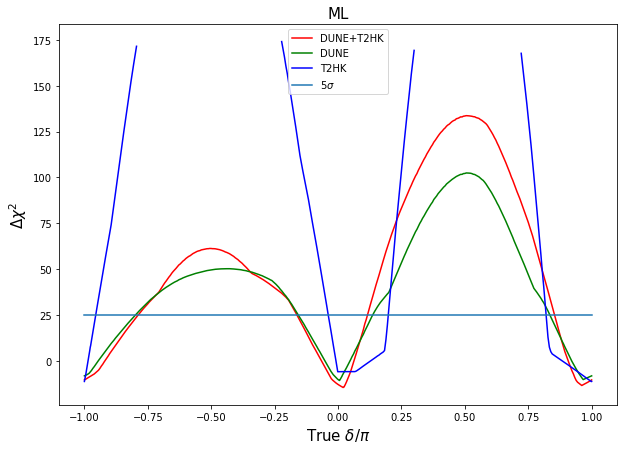

In [61]:
plt.figure(figsize = (10,7))
# plt.ylim(0, 16)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['deltacp']/180
plt.plot(x, delta_chi2_DUT2,'r', label='DUNE+T2HK')
plt.plot(x, delta_chi2_DU,'g', label='DUNE')
plt.plot(x, delta_chi2_T2,'b', label='T2HK')
plt.plot(np.linspace(-1,1,100),np.full(100,25), label=r'$5 \sigma $')
plt.legend()
plt.title('ML', fontsize=15)

Text(0.5, 1.0, 'DUNE + T2HK')

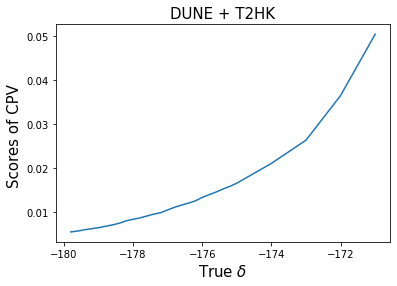

In [62]:
part = np.where((data2['deltacp']>-180) & (data2['deltacp']<-170))
plt.plot(data2['deltacp'][part],P_cpv_DUT2[part])
plt.xlabel(r'True $\delta $', fontsize=15)
plt.ylabel('Scores of CPV ', fontsize=15)
plt.title('DUNE + T2HK', fontsize=15)

Text(0.5, 1.0, 'DUNE + T2HK ')

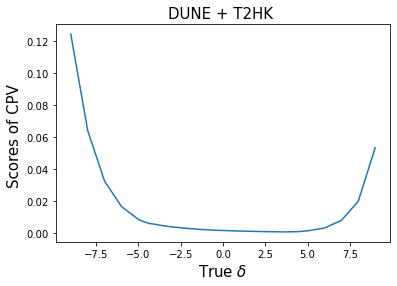

In [63]:
part = np.where((data2['deltacp']>-10) & (data2['deltacp']<10) )
plt.plot(data2['deltacp'][part],P_cpv_DUT2[part])
plt.xlabel(r'True $\delta $', fontsize=15)
plt.ylabel('Scores of CPV ', fontsize=15)
plt.title('DUNE + T2HK ', fontsize=15)

Text(0.5, 1.0, 'DUNE ')

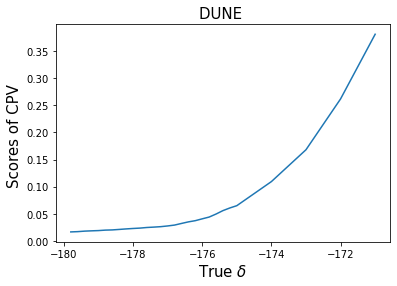

In [64]:
part = np.where((data2['deltacp']>-180) & (data2['deltacp']<-170))
plt.plot(data2['deltacp'][part],P_cpv_DU[part])
plt.xlabel(r'True $\delta $', fontsize=15)
plt.ylabel('Scores of CPV ', fontsize=15)
plt.title('DUNE ', fontsize=15)

Text(0.5, 1.0, 'DUNE ')

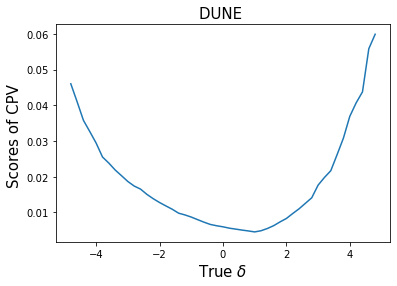

In [65]:
part = np.where((data2['deltacp']>-5) & (data2['deltacp']<5) )
plt.plot(data2['deltacp'][part],P_cpv_DU[part])
plt.xlabel(r'True $\delta $', fontsize=15)
plt.ylabel('Scores of CPV ', fontsize=15)
plt.title('DUNE ', fontsize=15)

Text(0.5, 1.0, 'T2HK ')

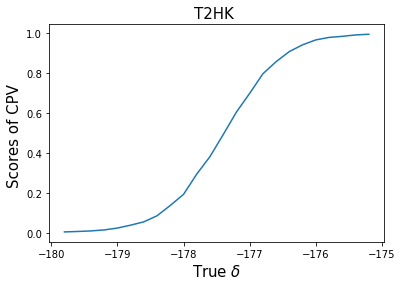

In [66]:
part = np.where((data2['deltacp']>-180) & (data2['deltacp']<-175))
plt.plot(data2['deltacp'][part],P_cpv_T2[part])
plt.xlabel(r'True $\delta $', fontsize=15)
plt.ylabel('Scores of CPV ', fontsize=15)
plt.title('T2HK ', fontsize=15)

Text(0.5, 1.0, 'T2HK ')

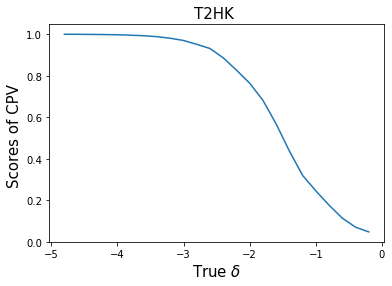

In [67]:
part = np.where((data2['deltacp']>-5) & (data2['deltacp']<0) )
plt.plot(data2['deltacp'][part],P_cpv_T2[part])
plt.xlabel(r'True $\delta $', fontsize=15)
plt.ylabel('Scores of CPV ', fontsize=15)
plt.title('T2HK ', fontsize=15)

# Comparing to Tradition Method

## Load Data

In [68]:
delta_cp = []
OFF_DU = []
OFF_T2 = []
OFF_DUT2 = []
ON_DU = []
ON_T2 = []
ON_DUT2 = []

In [69]:
#Import txt檔
f = open("sample_chi_4-1_run1.txt")
#總資料組數
N = 121

In [70]:
for i in range(N):
    s = f.readline().split()
    array = []
    for j in range(len(s)) :
        array.append(float(s[j])) 
    delta_cp.append(array[0])
    OFF_DU.append(array[1]) 
    OFF_T2.append(array[2])
    OFF_DUT2.append(array[3])
    ON_DU.append(array[4]) 
    ON_T2.append(array[5]) 
    ON_DUT2.append(array[6]) 

In [71]:
delta_cp = np.array(delta_cp)
OFF_DU = np.array(OFF_DU)
OFF_T2 = np.array(OFF_T2)
OFF_DUT2 = np.array(OFF_DUT2)
ON_DU = np.array(ON_DU)
ON_T2 = np.array(ON_T2)
ON_DUT2 = np.array(ON_DUT2)

## Plot

### DUNE+T2HK

Text(0.5, 1.0, 'DUNE+T2HK')

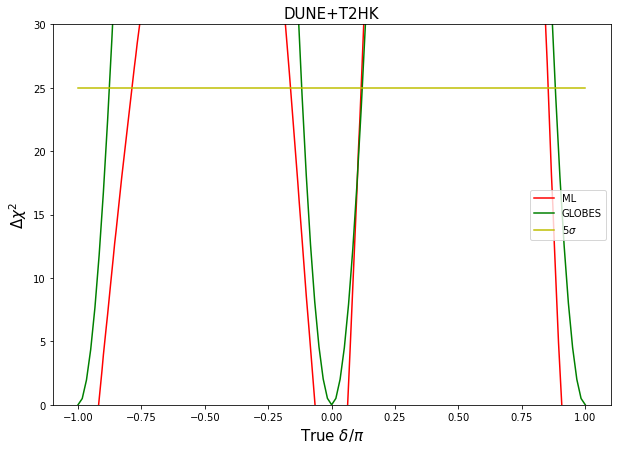

In [72]:
plt.figure(figsize = (10,7))
plt.ylim(0,30)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['deltacp']/180
plt.plot(x, delta_chi2_DUT2,'r', label='ML')
plt.plot(delta_cp/180, OFF_DUT2,'g', label='GLOBES')
plt.plot(np.linspace(-1,1,100),np.full(100,25),'y', label=r'$5\sigma $')
plt.legend()
plt.title('DUNE+T2HK', fontsize=15)

### DUNE

Text(0.5, 1.0, 'DUNE')

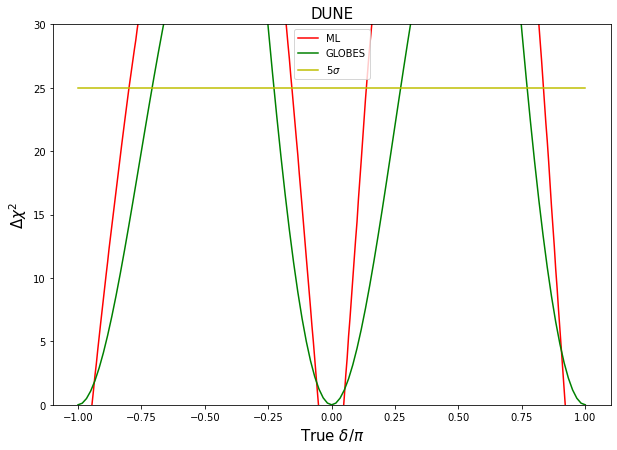

In [73]:
plt.figure(figsize = (10,7))
plt.ylim(0,30)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['deltacp']/180
plt.plot(x, delta_chi2_DU,'r', label='ML')
plt.plot(delta_cp/180, OFF_DU,'g', label='GLOBES')
plt.plot(np.linspace(-1,1,100),np.full(100,25),'y', label=r'$5\sigma $')
plt.legend()
plt.title('DUNE', fontsize=15)

### T2HK

Text(0.5, 1.0, 'T2HK')

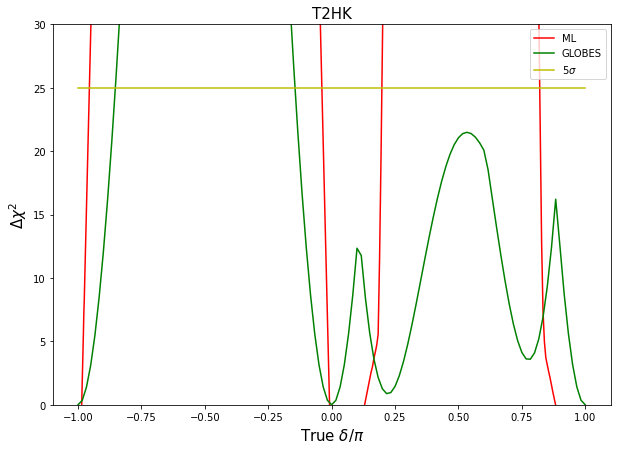

In [74]:
plt.figure(figsize = (10,7))
plt.ylim(0,30)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['deltacp']/180
plt.plot(x, delta_chi2_T2,'r', label='ML')
plt.plot(delta_cp/180, OFF_T2,'g', label='GLOBES')
plt.plot(np.linspace(-1,1,100),np.full(100,25),'y', label=r'$5\sigma $')
plt.legend()
plt.title('T2HK', fontsize=15)